In [1]:
import pandas as pd

Reading data

In [79]:
data = pd.read_csv('Fraud_Data.csv')

In [80]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [49]:
f_data = data[data["class"] == 1]
non_f_data = data[data["class"] == 0]

Count number of transactions with multiple ip address but same device id

In [13]:
groupby_device_ip = data.groupby(['device_id', 'ip_address'])['ip_address'].count().to_frame()

# check user with same device but multiple ip addresses
groupby_device_ip[groupby_device_ip['ip_address']>1]

# check count of ip addresses for unique device id
groupby_device_ip.ip_address.unique()

array([ 1, 11,  8, 14,  7, 12,  9, 13, 10, 15,  6,  4, 17, 19, 16,  5,  3,
       18, 20,  2])

In [50]:
groupby_device_ip = f_data.groupby(['device_id', 'ip_address'])['ip_address'].count().to_frame()

# check user with same device but multiple ip addresses
groupby_device_ip[groupby_device_ip['ip_address']>1]

# check count of ip addresses for unique device id
groupby_device_ip.ip_address.unique()

array([10,  1,  7, 13,  6, 11,  8, 12,  9, 14,  5,  3, 16, 18, 15, 19,  4,
        2, 17])

In [51]:
groupby_device_ip = non_f_data.groupby(['device_id', 'ip_address'])['ip_address'].count().to_frame()

# check user with same device but multiple ip addresses
groupby_device_ip[groupby_device_ip['ip_address']>1]

# check count of ip addresses for unique device id
groupby_device_ip.ip_address.unique()

array([1])

Count the number of transactions from one device with little time difference

In [45]:
data['days'] = (pd.to_datetime(data['purchase_time']) - pd.to_datetime(data['signup_time'])).dt.days
data['time'] = (pd.to_datetime(data['purchase_time']) - pd.to_datetime(data['signup_time'])).astype(str).apply(lambda x : x[-8:])
# filter out df with short time difference
short_time_diff = data[(data['days'] == 0) & (data['time'] < '00:00:10')]
# count number of transactions for each device id with short time difference
short_time_diff = short_time_diff.groupby('device_id')['purchase_value'].count()
short_time_diff

device_id
AAAXXOZJRZRAO    10
AANYBGQSWHRTK     7
ADEDUDCYQMYTI    13
AENUQLGTUHYMS     6
AIGPGDVRDKOKT    11
                 ..
ZYHVSPGHWACPO     5
ZYZQZXBXADPST    15
ZZCAWCKYVMWNH     8
ZZFFPOVMCQVCG     6
ZZQPVRBHRMVYD    11
Name: purchase_value, Length: 760, dtype: int64

In [56]:
data = non_f_data.copy()
data['days'] = (pd.to_datetime(data['purchase_time']) - pd.to_datetime(data['signup_time'])).dt.days
data['time'] = (pd.to_datetime(data['purchase_time']) - pd.to_datetime(data['signup_time'])).astype(str).apply(lambda x : x[-8:])
# filter out df with short time difference
short_time_diff = data[(data['days'] == 0) & (data['time'] < '00:00:10')]
# count number of transactions for each device id with short time difference
short_time_diff = short_time_diff.groupby('device_id')['purchase_value'].count().reset_index().rename(columns={'purchase_value': 'purchase_count'})
short_time_diff.purchase_count.unique()

array([], dtype=int64)

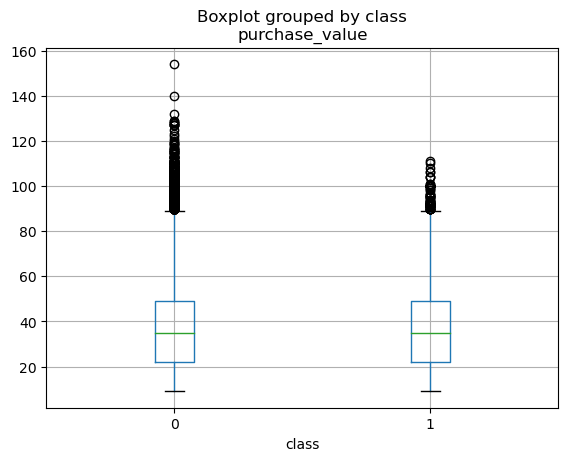

In [82]:
df = data[['purchase_value', 'class']]
df.boxplot(column='purchase_value', by='class').figure
# data['class'].unique()

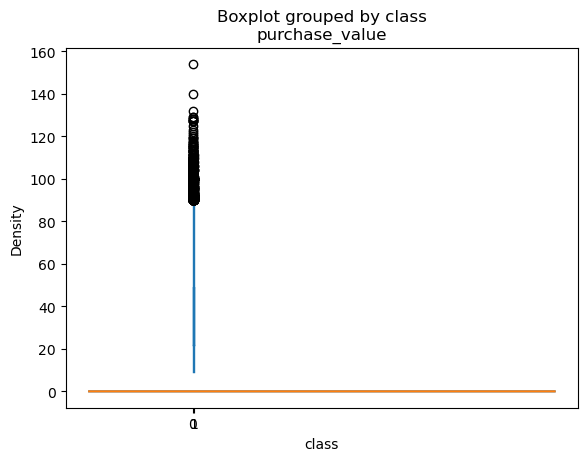

In [85]:
data['purchase_value'].plot.kde().figure

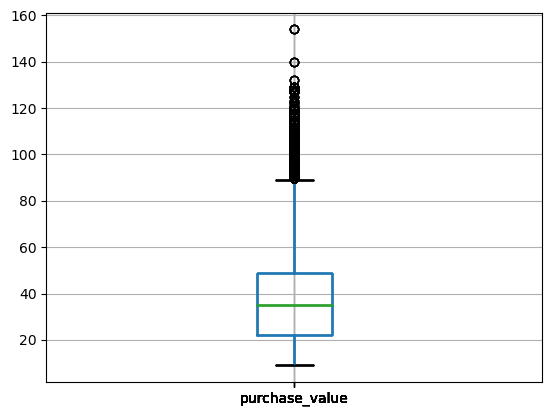

In [66]:
f_data.boxplot(column='purchase_value').figure

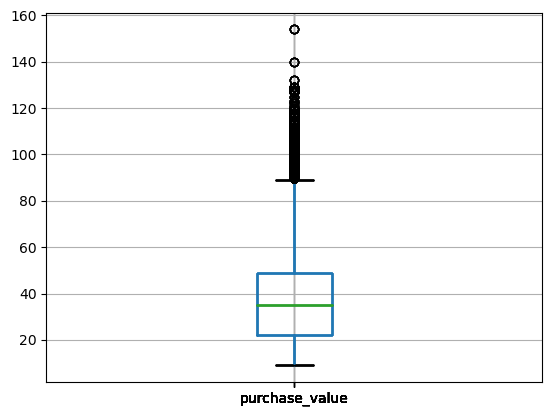

In [67]:
non_f_data.boxplot(column='purchase_value').figure

In [15]:
df = df.rename(columns={'ip_address': 'lower_bound_ip_address'})
df
new = df.set_index('lower_bound_ip_address').join(ip_country, on='lower_bound_ip_address', how='left')
new

/Users/tohzhiaowei/opt/anaconda3/envs/bt4012_deep_learning/lib/python3.7/site-packages/pandas/core/reshape/merge.py:1208: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,lower_bound_ip_address,upper_bound_ip_address,country
lower_bound_ip_address,,,,,,,,,,,,,
7.327584e+08,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,0,NaN,NaN,NaN
3.503114e+08,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,0,NaN,NaN,NaN
2.621474e+09,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,1,NaN,NaN,NaN
3.840542e+09,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,0,NaN,NaN,NaN
4.155831e+08,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.451155e+09,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,1,NaN,NaN,NaN
2.439047e+09,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,0,NaN,NaN,NaN
2.748471e+09,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,0,NaN,NaN,NaN


In [3]:
df.source.unique()

array(['SEO', 'Ads', 'Direct'], dtype=object)

In [4]:
df.browser.unique()

array(['Chrome', 'Opera', 'Safari', 'IE', 'FireFox'], dtype=object)